In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_column',None)
pd.set_option('display.max_row',None)

from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

In [2]:
# Import data
df = pd.read_excel('../input/league-of-legends-world-championship-2019/2019-summer-match-data-OraclesElixir-2019-11-10.xlsx')
df.head()

,gameid,url,league,split,date,week,game,patchno,playerid,side,position,player,team,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,k,d,a,teamkills,teamdeaths,doubles,triples,quadras,pentas,fb,fbassist,fbvictim,fbtime,kpm,okpm,ckpm,fd,fdtime,teamdragkills,oppdragkills,elementals,oppelementals,firedrakes,waterdrakes,earthdrakes,airdrakes,elders,oppelders,herald,heraldtime,ft,fttime,firstmidouter,firsttothreetowers,teamtowerkills,opptowerkills,fbaron,fbarontime,teambaronkills,oppbaronkills,dmgtochamps,dmgtochampsperminute,dmgshare,earnedgoldshare,wards,wpm,wardshare,wardkills,wcpm,visionwards,visionwardbuys,visiblewardclearrate,invisiblewardclearrate,totalgold,earnedgpm,goldspent,gspd,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,oppgoldat10,gdat10,goldat15,oppgoldat15,gdat15,xpat10,oppxpat10,xpdat10,csat10,oppcsat10,csdat10,csat15,oppcsat15,csdat15
0,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.286146,PI-RR,1,9.19,1,Blue,Top,Evi,DetonatioN FocusMe,Gnar,Qiyana,Gangplank,Akali,Elise,Olaf,26.533333,0,0,4,4,7,22,0,0,0,0,0,0,0,3.879983,0.000000,0.037688,1.092965,0,9.717567,1,2,0,0,0,0,0,0,0,0,0,NaN,0,13.588567,0,0,1,10,0.0,23.779817,0,1,11588,436.733668,0.312067,0.206844,11,0.414573,0.105769,4,0.150754,4,6,,,8407,184.059799,8300,-0.151448,180,8,4,1,7.085427,3078,3440,-362,4670,5468,-798,4530,5051,-521,76,90,-14,116,122,-6
1,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.286146,PI-RR,1,9.19,2,Blue,Jungle,Steal,DetonatioN FocusMe,Ekko,Qiyana,Gangplank,Akali,Elise,Olaf,26.533333,0,1,4,5,7,22,0,0,0,0,0,0,0,3.879983,0.037688,0.263819,1.092965,1,9.717567,1,2,1,2,0,0,0,1,0,0,0,NaN,0,13.588567,0,0,1,10,0.0,23.779817,0,1,7925,298.680905,0.213422,0.166862,24,0.904523,0.230769,8,0.301508,11,13,,,7463,148.481910,7360,-0.296789,35,96,76,0,4.937186,3684,4055,-371,4912,6278,-1366,3679,3928,-249,60,64,-4,88,105,-17
2,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.286146,PI-RR,1,9.19,3,Blue,Middle,Ceros,DetonatioN FocusMe,Nocturne,Qiyana,Gangplank,Akali,Elise,Olaf,26.533333,0,1,5,6,7,22,0,0,0,0,0,0,0,3.879983,0.037688,0.113065,1.092965,0,9.717567,1,2,0,0,0,0,0,0,0,0,0,NaN,0,13.588567,0,0,1,10,0.0,23.779817,0,1,7557,284.811558,0.203512,0.210106,13,0.489950,0.125000,1,0.037688,6,7,,,8484,186.961809,7700,-0.281729,186,6,4,0,7.236181,3926,3569,357,5487,6116,-629,4751,4533,218,88,85,3,131,150,-19
3,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.286146,PI-RR,1,9.19,4,Blue,ADC,Yutapon,DetonatioN FocusMe,Lucian,Qiyana,Gangplank,Akali,Elise,Olaf,26.533333,0,3,4,1,7,22,1,0,0,0,0,0,0,3.879983,0.113065,0.414573,1.092965,0,9.717567,1,2,0,0,0,0,0,0,0,0,0,NaN,0,13.588567,0,0,1,10,0.0,23.779817,0,1,7369,277.726131,0.198449,0.300743,9,0.339196,0.086538,7,0.263819,3,4,,,10624,267.615075,10150,-0.215385,219,20,20,0,9.007538,3579,3969,-390,5313,7142,-1829,3526,3532,-6,87,76,11,119,134,-15
4,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.286146,PI-RR,1,9.19,5,Blue,Support,Gaeng,DetonatioN FocusMe,Thresh,Qiyana,Gangplank,Akali,Elise,Olaf,26.533333,0,2,5,2,7,22,0,0,0,0,0,0,1,3.879983,0.075377,0.000000,1.092965,0,9.717567,1,2,0,0,0,0,0,0,0,0,0,NaN,0,13.588567,0,0,1,10,0.0,23.779817,0,1,2694,101.532663,0.07255,0.115445,47,1.771357,0.451923,8,0.301508,13,14,,,6249,102.728141,5450,-0.296875,12,2,2,0,0.527638,2088,2394,-306,3163,4319,-1156,2731,2376,355,4,3,1,6,5,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 98 columns):
gameid                     1428 non-null int64
url                        1428 non-null object
league                     1428 non-null object
split                      1428 non-null object
date                       1428 non-null float64
week                       1428 non-null object
game                       1428 non-null object
patchno                    1428 non-null float64
playerid                   1428 non-null int64
side                       1428 non-null object
position                   1428 non-null object
player                     1428 non-null object
team                       1428 non-null object
champion                   1428 non-null object
ban1                       1428 non-null object
ban2                       1428 non-null object
ban3                       1428 non-null object
ban4                       1428 non-null object
ban5                       14

In [4]:
df.shape

(1428, 98)

In [5]:
teamdf = df.loc[df['position']=='Team',:]
teamdf.head()

,gameid,url,league,split,date,week,game,patchno,playerid,side,position,player,team,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,k,d,a,teamkills,teamdeaths,doubles,triples,quadras,pentas,fb,fbassist,fbvictim,fbtime,kpm,okpm,ckpm,fd,fdtime,teamdragkills,oppdragkills,elementals,oppelementals,firedrakes,waterdrakes,earthdrakes,airdrakes,elders,oppelders,herald,heraldtime,ft,fttime,firstmidouter,firsttothreetowers,teamtowerkills,opptowerkills,fbaron,fbarontime,teambaronkills,oppbaronkills,dmgtochamps,dmgtochampsperminute,dmgshare,earnedgoldshare,wards,wpm,wardshare,wardkills,wcpm,visionwards,visionwardbuys,visiblewardclearrate,invisiblewardclearrate,totalgold,earnedgpm,goldspent,gspd,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,oppgoldat10,gdat10,goldat15,oppgoldat15,gdat15,xpat10,oppxpat10,xpdat10,csat10,oppcsat10,csdat10,csat15,oppcsat15,csdat15
10,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.286146,PI-RR,1,9.19,100,Blue,Team,Team,DetonatioN FocusMe,,Qiyana,Gangplank,Akali,Elise,Olaf,26.533333,0,7,22,18,7,22,,,,,0,0,1,3.879983,0.263819,0.829146,1.092965,1,9.717567,1,2,1,2,0,0,0,1,0,0,0,13.109583,0,13.588567,0,0,1,10,0.0,23.779817,0,1,37133,1399.484925,,,104,3.919598,1.0,28,1.055276,37,44,0.435897,0.268293,41227,889.846734,38960,-0.243463,632,132,106,1,28.793970,16355,17427,-1072,23545,29323,-5778,19217,19420,-203,315,318,-3,460,516,-56
11,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.286146,PI-RR,1,9.19,200,Red,Team,Team,Splyce,,Heimerdinger,Pantheon,Syndra,Cassiopeia,Kai'Sa,26.533333,1,22,7,51,22,7,,,,,1,1,0,3.879983,0.829146,0.263819,1.092965,0,9.717567,2,1,2,1,0,1,0,1,0,0,1,13.109583,1,13.588567,1,1,10,1,1.0,23.779817,1,0,59544,2244.120603,,,80,3.015075,1.0,51,1.922111,35,41,0.710526,0.280702,56670,1471.869347,49760,0.243463,688,188,114,23,33.015075,17427,16355,1072,29323,23545,5778,19420,19217,203,318,315,3,516,460,56
22,1070330,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.223889,PI-RR,1,9.19,100,Blue,Team,Team,Clutch Gaming,,Syndra,Yuumi,Qiyana,Caitlyn,Draven,38.066667,0,8,16,17,8,16,,,,,1,1,0,7.924383,0.210158,0.420315,0.630473,0,17.121617,0,4,0,4,0,0,0,0,0,0,1,13.114183,0,13.696417,0,0,3,11,0.0,22.977400,0,2,51747,1359.378284,,,136,3.572680,1.0,54,1.418564,54,58,0.555556,0.287879,61900,977.894921,58800,-0.085392,1022,170,128,9,31.313485,15086,15316,-230,22236,24164,-1928,17871,19418,-1547,295,289,6,444,453,-9
23,1070330,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.223889,PI-RR,1,9.19,200,Red,Team,Team,Unicorns of Love,,Pantheon,Rumble,Gangplank,Skarner,Elise,38.066667,1,16,8,34,16,8,,,,,0,0,1,7.924383,0.420315,0.210158,0.630473,1,17.121617,4,0,4,0,1,0,1,2,0,0,0,13.114183,1,13.696417,1,1,11,3,1.0,22.977400,2,0,73706,1936.234676,,,135,3.546410,1.0,62,1.628722,35,35,0.580645,0.212766,68625,1154.558669,64045,0.085392,853,220,103,42,28.187391,15316,15086,230,24164,22236,1928,19418,17871,1547,289,295,-6,453,444,9
34,1070349,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.329711,PI-RR,1,9.19,100,Blue,Team,Team,Mammoth,,Qiyana,Kayle,Morgana,Thresh,Pyke,37.583333,1,18,8,51,18,8,,,,,0,0,1,3.360983,0.478936,0.212860,0.691796,1,8.318133,4,0,4,0,1,2,1,0,0,0,1,15.583383,1,17.613883,1,1,9,2,1.0,27.446517,1,0,72107,1918.589800,,,115,3.059867,1.0,78,2.075388,50,53,0.710526,0.432432,69069,1189.090909,60483,0.035762,990,233,158,13,32.541020,15282,15331,-49,23879,24123,-244,18055,17943,112,337,312,25,534,496,38


In [6]:
teamdf.shape

(238, 98)

In [7]:
playersdf = df.loc[df['position']!='Team',:]
playersdf.head()

,gameid,url,league,split,date,week,game,patchno,playerid,side,position,player,team,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,k,d,a,teamkills,teamdeaths,doubles,triples,quadras,pentas,fb,fbassist,fbvictim,fbtime,kpm,okpm,ckpm,fd,fdtime,teamdragkills,oppdragkills,elementals,oppelementals,firedrakes,waterdrakes,earthdrakes,airdrakes,elders,oppelders,herald,heraldtime,ft,fttime,firstmidouter,firsttothreetowers,teamtowerkills,opptowerkills,fbaron,fbarontime,teambaronkills,oppbaronkills,dmgtochamps,dmgtochampsperminute,dmgshare,earnedgoldshare,wards,wpm,wardshare,wardkills,wcpm,visionwards,visionwardbuys,visiblewardclearrate,invisiblewardclearrate,totalgold,earnedgpm,goldspent,gspd,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,oppgoldat10,gdat10,goldat15,oppgoldat15,gdat15,xpat10,oppxpat10,xpdat10,csat10,oppcsat10,csdat10,csat15,oppcsat15,csdat15
0,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.286146,PI-RR,1,9.19,1,Blue,Top,Evi,DetonatioN FocusMe,Gnar,Qiyana,Gangplank,Akali,Elise,Olaf,26.533333,0,0,4,4,7,22,0,0,0,0,0,0,0,3.879983,0.000000,0.037688,1.092965,0,9.717567,1,2,0,0,0,0,0,0,0,0,0,NaN,0,13.588567,0,0,1,10,0.0,23.779817,0,1,11588,436.733668,0.312067,0.206844,11,0.414573,0.105769,4,0.150754,4,6,,,8407,184.059799,8300,-0.151448,180,8,4,1,7.085427,3078,3440,-362,4670,5468,-798,4530,5051,-521,76,90,-14,116,122,-6
1,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.286146,PI-RR,1,9.19,2,Blue,Jungle,Steal,DetonatioN FocusMe,Ekko,Qiyana,Gangplank,Akali,Elise,Olaf,26.533333,0,1,4,5,7,22,0,0,0,0,0,0,0,3.879983,0.037688,0.263819,1.092965,1,9.717567,1,2,1,2,0,0,0,1,0,0,0,NaN,0,13.588567,0,0,1,10,0.0,23.779817,0,1,7925,298.680905,0.213422,0.166862,24,0.904523,0.230769,8,0.301508,11,13,,,7463,148.481910,7360,-0.296789,35,96,76,0,4.937186,3684,4055,-371,4912,6278,-1366,3679,3928,-249,60,64,-4,88,105,-17
2,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.286146,PI-RR,1,9.19,3,Blue,Middle,Ceros,DetonatioN FocusMe,Nocturne,Qiyana,Gangplank,Akali,Elise,Olaf,26.533333,0,1,5,6,7,22,0,0,0,0,0,0,0,3.879983,0.037688,0.113065,1.092965,0,9.717567,1,2,0,0,0,0,0,0,0,0,0,NaN,0,13.588567,0,0,1,10,0.0,23.779817,0,1,7557,284.811558,0.203512,0.210106,13,0.489950,0.125000,1,0.037688,6,7,,,8484,186.961809,7700,-0.281729,186,6,4,0,7.236181,3926,3569,357,5487,6116,-629,4751,4533,218,88,85,3,131,150,-19
3,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.286146,PI-RR,1,9.19,4,Blue,ADC,Yutapon,DetonatioN FocusMe,Lucian,Qiyana,Gangplank,Akali,Elise,Olaf,26.533333,0,3,4,1,7,22,1,0,0,0,0,0,0,3.879983,0.113065,0.414573,1.092965,0,9.717567,1,2,0,0,0,0,0,0,0,0,0,NaN,0,13.588567,0,0,1,10,0.0,23.779817,0,1,7369,277.726131,0.198449,0.300743,9,0.339196,0.086538,7,0.263819,3,4,,,10624,267.615075,10150,-0.215385,219,20,20,0,9.007538,3579,3969,-390,5313,7142,-1829,3526,3532,-6,87,76,11,119,134,-15
4,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.286146,PI-RR,1,9.19,5,Blue,Support,Gaeng,DetonatioN FocusMe,Thresh,Qiyana,Gangplank,Akali,Elise,Olaf,26.533333,0,2,5,2,7,22,0,0,0,0,0,0,1,3.879983,0.075377,0.000000,1.092965,0,9.717567,1,2,0,0,0,0,0,0,0,0,0,NaN,0,13.588567,0,0,1,10,0.0,23.779817,0,1,2694,101.532663,0.07255,0.115445,47,1.771357,0.451923,8,0.301508,13,14,,,6249,102.728141,5450,-0.296875,12,2,2,0,0.527638,2088,2394,-306,3163,4319,-1156,2731,2376,355,4,3,1,6,5,1


In [8]:
playersdf.shape

(1190, 98)

# **Ban & Pick**

 Each team has five ban opportunities. Each team has three bans, followed by three picks, two bans, and two champions. So ban1, ban2, and ban3 don't use it in our team, but I think that when the opponent takes it, a nasty champion comes out.
 


In [9]:
bans3 = teamdf[['ban1', 'ban2', 'ban3']].melt()
bans3.head()

,variable,value
0,ban1,Qiyana
1,ban1,Heimerdinger
2,ban1,Syndra
3,ban1,Pantheon
4,ban1,Qiyana


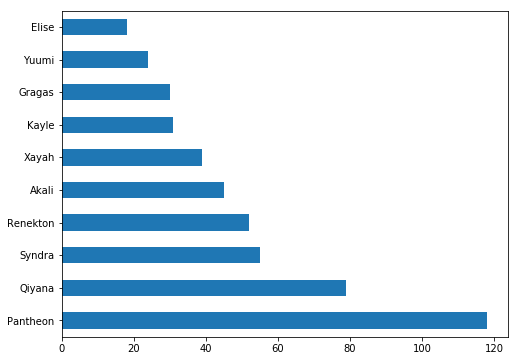

In [10]:
bans3['value'].value_counts()[:10].plot(kind='barh', figsize=(8, 6))

What are the most loved picks?

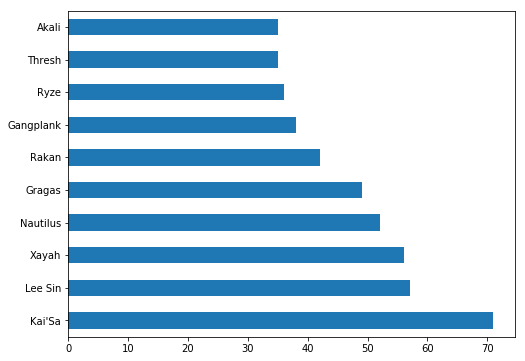

In [11]:
playersdf['champion'].value_counts()[:10].plot(kind='barh', figsize=(8, 6))

In addition to the Carry AD (Kai'sa and Xayah) and Grab supporter (Nautilus and Thresh), the lee sin continues to be loved in the jungle. and swappable Ryze, Gragas, Akali. What position did the chosen champions stand in?

In [12]:
playersdf.groupby(['champion','position'])['position'].count()

champion      position
Aatrox        Middle       1
              Top          9
Akali         Middle      24
              Top         11
Alistar       Support     14
Anivia        Middle       1
Ashe          ADC          4
Azir          Middle       4
              Top          1
Bard          Support      1
Blitzcrank    Support      8
Braum         Support      1
Caitlyn       ADC          4
Camille       Middle       3
              Top         11
Cassiopeia    ADC          1
              Middle       7
Cho'gath      Top          5
Corki         Middle       8
Draven        ADC          3
Ekko          Jungle       5
Elise         Jungle      32
Ezreal        ADC         22
              Middle       1
              Top          2
Fiddlesticks  Support      1
Fiora         Top          4
Galio         Middle       8
              Support      7
Gangplank     Top         38
Garen         ADC          8
Gnar          Top         18
Gragas        Jungle      40
              Suppor

In [13]:
pd.crosstab(playersdf.champion,playersdf.position).T.style.background_gradient(cmap='summer_r')

champion,Aatrox,Akali,Alistar,Anivia,Ashe,Azir,Bard,Blitzcrank,Braum,Caitlyn,Camille,Cassiopeia,Cho'gath,Corki,Draven,Ekko,Elise,Ezreal,Fiddlesticks,Fiora,Galio,Gangplank,Garen,Gnar,Gragas,Hecarim,Heimerdinger,Irelia,Jarvan IV,Jax,Jayce,Jhin,Jinx,Kai'Sa,Karma,Karthus,Kayle,Kennen,Kha'zix,Kled,Kog'Maw,LeBlanc,Lee Sin,Leona,Lissandra,Lucian,Lulu,Lux,Malphite,Mordekaiser,Morgana,Nautilus,Neeko,Nidalee,Nocturne,Olaf,Orianna,Ornn,Pantheon,Poppy,Pyke,Qiyana,Quinn,Rakan,Rek'Sai,Renekton,Rengar,Rumble,Ryze,Sejuani,Shen,Sion,Sivir,Skarner,Sona,Sylas,Syndra,Tahm Kench,Taliyah,Thresh,Tristana,Twisted Fate,Urgot,Varus,Vayne,Veigar,Vi,Viktor,Vladimir,Volibear,Xayah,Xin Zhao,Yasuo,Yorick,Yuumi,Ziggs,Zilean,Zoe
position,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ADC,0,0,0,0,4,0,0,0,0,4,0,1,0,0,3,0,0,22,0,0,0,0,8,0,0,0,6,1,0,0,0,2,3,71,0,0,1,0,0,0,1,0,0,0,0,10,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,1,0,8,0,0,0,5,0,0,9,2,3,0,0,1,0,56,0,9,0,0,0,0,1
Jungle,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,32,0,0,0,0,0,0,0,40,2,0,0,18,0,0,0,0,0,0,5,0,0,2,0,0,0,57,0,0,0,0,0,0,0,0,0,0,1,11,10,0,0,0,0,0,11,0,0,22,0,0,0,0,2,0,0,0,8,0,1,0,0,9,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
Middle,1,24,0,1,0,4,0,0,0,0,3,7,0,8,0,0,0,1,0,0,8,0,0,0,0,0,0,3,0,0,4,0,0,0,1,0,11,0,0,2,0,21,0,0,6,4,0,0,1,0,0,4,4,0,1,0,12,0,1,1,1,10,0,0,0,5,0,1,29,0,0,3,0,0,0,1,21,0,0,0,9,8,0,0,0,3,0,1,2,0,0,0,5,0,0,1,1,4
Support,0,0,14,0,0,0,1,8,1,0,0,0,0,0,0,0,0,0,1,0,7,0,0,0,9,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,20,0,0,2,1,0,0,8,48,0,0,0,0,0,2,0,1,11,0,0,42,0,0,0,0,0,0,4,0,0,0,0,0,0,7,0,35,0,0,0,0,0,0,0,0,0,1,0,0,0,0,13,0,0,0
Top,9,11,0,0,0,1,0,0,0,0,11,0,5,0,0,0,0,2,0,4,0,38,0,18,0,0,0,4,0,1,15,0,0,0,1,0,11,7,0,7,0,0,0,0,0,2,0,0,0,6,0,0,2,0,0,0,0,8,0,1,1,1,4,0,0,28,1,4,7,0,4,4,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,14,0,0,0,1,1,0,0,0,0


In fact, in League of Legends Worlds 2019, swappable champions are loved and banned.

Akali Mid: 24, Top: 11

Ryze mid: 29, top: 7

Gragas the Jungle: 40, and the Support: 9


Qiyana jungle: 11, mid: 10, top: 1

Renekton Mid: 5, Top: 28

Syndra AD: 8, Mid: 21

etc

In other words, picking a swappable champion (who doesn't know where the champion stands on the line) also puts a high priority on the line. Also for winning objects.

In [14]:
teamdf.groupby(['team','result'])['result'].count()

team                 result
AHQ e-Sports Club    0          6
Cloud9               0          4
                     1          2
Clutch Gaming        0          7
                     1          6
Damwon Gaming        0          5
                     1         13
DetonatioN FocusMe   0          3
                     1          1
Flamengo             0          4
                     1          1
Fnatic               0          5
                     1          5
Funplus Phoenix      0          4
                     1         14
G2 Esports           0          7
                     1         11
GAM Esports          0          5
                     1          1
Griffin              0          4
                     1          7
Hong Kong Attitude   0          8
                     1          6
Invictus Gaming      0          6
                     1          8
Isurus Gaming        0          5
                     1          3
J Team               0          3
                    

In [15]:
pd.crosstab(teamdf.team,teamdf.result).T.style.background_gradient(cmap='summer_r')

team,AHQ e-Sports Club,Cloud9,Clutch Gaming,Damwon Gaming,DetonatioN FocusMe,Flamengo,Fnatic,Funplus Phoenix,G2 Esports,GAM Esports,Griffin,Hong Kong Attitude,Invictus Gaming,Isurus Gaming,J Team,Lowkey Esports,MEGA Esports,Mammoth,Royal Never Give Up,Royal Youth,SK Telecom T1,Splyce,Team Liquid,Unicorns of Love
result,,,,,,,,,,,,,,,,,,,,,,,,
0,6,4,7,5,3,4,5,4,7,5,4,8,6,5,3,5,3,3,3,6,5,9,3,6
1,0,2,6,13,1,1,5,14,11,1,7,6,8,3,3,3,1,2,3,2,9,11,3,4


 # LCK
 
LCK played Damwon, Griffin and T1 in the LoL Worlds 2019. Let's open the LCK data further.

In [16]:
lckdf = df.loc[df['team'].isin(['Damwon Gaming', 'Griffin','SK Telecom T1']) ,:]
lckdf.head()

,gameid,url,league,split,date,week,game,patchno,playerid,side,position,player,team,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,k,d,a,teamkills,teamdeaths,doubles,triples,quadras,pentas,fb,fbassist,fbvictim,fbtime,kpm,okpm,ckpm,fd,fdtime,teamdragkills,oppdragkills,elementals,oppelementals,firedrakes,waterdrakes,earthdrakes,airdrakes,elders,oppelders,herald,heraldtime,ft,fttime,firstmidouter,firsttothreetowers,teamtowerkills,opptowerkills,fbaron,fbarontime,teambaronkills,oppbaronkills,dmgtochamps,dmgtochampsperminute,dmgshare,earnedgoldshare,wards,wpm,wardshare,wardkills,wcpm,visionwards,visionwardbuys,visiblewardclearrate,invisiblewardclearrate,totalgold,earnedgpm,goldspent,gspd,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,oppgoldat10,gdat10,goldat15,oppgoldat15,gdat15,xpat10,oppxpat10,xpdat10,csat10,oppcsat10,csdat10,csat15,oppcsat15,csdat15
77,1070393,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43741.218981,PI-RR,2,9.19,6,Red,Top,Nuguri,Damwon Gaming,Vladimir,Pantheon,Karthus,Syndra,Elise,Taliyah,34.633333,1,4,0,6,17,12,0,0,0,0,0,0,0,4.918617,0.115496,0.057748,0.837344,0,6.7391,4,1,0,0,0,0,0,0,0,0,1,NaN,1,13.67085,1,1,9,2,1.0,31.1454,1,0,23851,688.671800,0.324362,0.27462,17,0.490857,0.132812,7,0.202117,1,2,,,17152,364.887777,13825,0.209790,320,28,13,4,10.048123,3563,3137,426,5673,4974,699,4699,4532,167,88,81,7,142,114,28
78,1070393,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43741.218981,PI-RR,2,9.19,7,Red,Jungle,Canyon,Damwon Gaming,Lee Sin,Pantheon,Karthus,Syndra,Elise,Taliyah,34.633333,1,3,2,9,17,12,0,0,0,0,0,0,0,4.918617,0.086622,0.144370,0.837344,1,6.7391,4,1,4,1,1,3,0,0,0,0,1,NaN,1,13.67085,1,1,9,2,1.0,31.1454,1,0,9528,275.110683,0.129576,0.159272,26,0.750722,0.203125,11,0.317613,14,14,,,11844,211.625024,11425,0.042458,30,145,91,11,5.052936,3427,3841,-414,4942,5151,-209,3592,3993,-401,59,64,-5,86,93,-7
79,1070393,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43741.218981,PI-RR,2,9.19,8,Red,Middle,ShowMaker,Damwon Gaming,LeBlanc,Pantheon,Karthus,Syndra,Elise,Taliyah,34.633333,1,5,2,6,17,12,0,0,0,0,0,0,0,4.918617,0.144370,0.028874,0.837344,0,6.7391,4,1,0,0,0,0,0,0,0,0,1,NaN,1,13.67085,1,1,9,2,1.0,31.1454,1,0,19791,571.443696,0.269148,0.232722,12,0.346487,0.093750,16,0.461983,5,5,,,15224,309.218864,13025,0.255411,269,20,13,0,8.344562,3845,2696,1149,6327,4406,1921,4690,4038,652,85,63,22,139,105,34
80,1070393,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43741.218981,PI-RR,2,9.19,9,Red,ADC,Nuclear,Damwon Gaming,Kai'Sa,Pantheon,Karthus,Syndra,Elise,Taliyah,34.633333,1,5,4,4,17,12,1,1,0,0,0,0,1,4.918617,0.144370,0.115496,0.837344,0,6.7391,4,1,0,0,0,0,0,0,0,0,1,NaN,1,13.67085,1,1,9,2,1.0,31.1454,1,0,16187,467.382098,0.220135,0.227768,14,0.404235,0.109375,17,0.490857,6,6,,,14996,302.635611,12750,-0.181818,265,16,8,4,8.113571,3125,3741,-616,5027,5188,-161,2858,3067,-209,69,83,-14,100,128,-28
81,1070393,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43741.218981,PI-RR,2,9.19,10,Red,Support,BeryL,Damwon Gaming,Leona,Pantheon,Karthus,Syndra,Elise,Taliyah,34.633333,1,0,4,12,17,12,0,0,0,0,0,0,0,4.918617,0.000000,0.000000,0.837344,0,6.7391,4,1,0,0,0,0,0,0,0,0,1,NaN,1,13.67085,1,1,9,2,1.0,31.1454,1,0,4175,120.548604,0.056778,0.105618,59,1.703561,0.460938,12,0.346487,17,17,,,9375,140.335322,7825,0.035772,80,0,0,0,2.309913,2080,2569,-489,3179,3411,-232,2534,2497,37,15,3,12,24,5,19


In [17]:
lck_team_df = lckdf[lckdf['player']=='Team']

In [18]:
lck_players_df = lckdf[lckdf['player']!='Team']

In [19]:
pd.crosstab([lck_team_df.team,lck_team_df.result],lck_team_df.side,margins=True).style.background_gradient(cmap='summer_r')

The reason for the relatively large number of games in Damwon is that the game has been played since Play In.

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


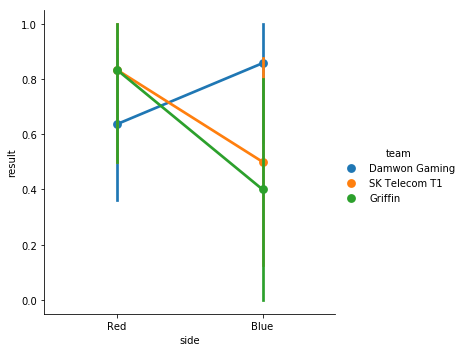

In [20]:
sns.factorplot('side','result',hue = 'team',data = lck_team_df)
plt.show()

Unlike the T1 and Griffin, Damwon won a lot when he started with the Blues.

In [21]:
lck_players_df['kda'] = (lck_players_df['k'] + lck_players_df['a'])/lck_players_df['d']

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


If d is 0, kda is an inf value, so kda is replaced with the sum of k and a.

In [22]:
lck_players_df['kda']=lck_players_df['kda'].replace(np.inf,(lck_players_df['k'] + lck_players_df['a']))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
lck_players_df

,gameid,url,league,split,date,week,game,patchno,playerid,side,position,player,team,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,k,d,a,teamkills,teamdeaths,doubles,triples,quadras,pentas,fb,fbassist,fbvictim,fbtime,kpm,okpm,ckpm,fd,fdtime,teamdragkills,oppdragkills,elementals,oppelementals,firedrakes,waterdrakes,earthdrakes,airdrakes,elders,oppelders,herald,heraldtime,ft,fttime,firstmidouter,firsttothreetowers,teamtowerkills,opptowerkills,fbaron,fbarontime,teambaronkills,oppbaronkills,dmgtochamps,dmgtochampsperminute,dmgshare,earnedgoldshare,wards,wpm,wardshare,wardkills,wcpm,visionwards,visionwardbuys,visiblewardclearrate,invisiblewardclearrate,totalgold,earnedgpm,goldspent,gspd,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,oppgoldat10,gdat10,goldat15,oppgoldat15,gdat15,xpat10,oppxpat10,xpdat10,csat10,oppcsat10,csdat10,csat15,oppcsat15,csdat15,kda
77,1070393,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43741.218981,PI-RR,2,9.19,6,Red,Top,Nuguri,Damwon Gaming,Vladimir,Pantheon,Karthus,Syndra,Elise,Taliyah,34.633333,1,4,0,6,17,12,0,0,0,0,0,0,0,4.918617,0.115496,0.057748,0.837344,0,6.739100,4,1,0,0,0,0,0,0,0,0,1,NaN,1,13.670850,1,1,9,2,1.0,31.145400,1,0,23851,688.671800,0.324362,0.27462,17,0.490857,0.132812,7,0.202117,1,2,,,17152,364.887777,13825,0.209790,320,28,13,4,10.048123,3563,3137,426,5673,4974,699,4699,4532,167,88,81,7,142,114,28,10.000000
78,1070393,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43741.218981,PI-RR,2,9.19,7,Red,Jungle,Canyon,Damwon Gaming,Lee Sin,Pantheon,Karthus,Syndra,Elise,Taliyah,34.633333,1,3,2,9,17,12,0,0,0,0,0,0,0,4.918617,0.086622,0.144370,0.837344,1,6.739100,4,1,4,1,1,3,0,0,0,0,1,NaN,1,13.670850,1,1,9,2,1.0,31.145400,1,0,9528,275.110683,0.129576,0.159272,26,0.750722,0.203125,11,0.317613,14,14,,,11844,211.625024,11425,0.042458,30,145,91,11,5.052936,3427,3841,-414,4942,5151,-209,3592,3993,-401,59,64,-5,86,93,-7,6.000000
79,1070393,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43741.218981,PI-RR,2,9.19,8,Red,Middle,ShowMaker,Damwon Gaming,LeBlanc,Pantheon,Karthus,Syndra,Elise,Taliyah,34.633333,1,5,2,6,17,12,0,0,0,0,0,0,0,4.918617,0.144370,0.028874,0.837344,0,6.739100,4,1,0,0,0,0,0,0,0,0,1,NaN,1,13.670850,1,1,9,2,1.0,31.145400,1,0,19791,571.443696,0.269148,0.232722,12,0.346487,0.093750,16,0.461983,5,5,,,15224,309.218864,13025,0.255411,269,20,13,0,8.344562,3845,2696,1149,6327,4406,1921,4690,4038,652,85,63,22,139,105,34,5.500000
80,1070393,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43741.218981,PI-RR,2,9.19,9,Red,ADC,Nuclear,Damwon Gaming,Kai'Sa,Pantheon,Karthus,Syndra,Elise,Taliyah,34.633333,1,5,4,4,17,12,1,1,0,0,0,0,1,4.918617,0.144370,0.115496,0.837344,0,6.739100,4,1,0,0,0,0,0,0,0,0,1,NaN,1,13.670850,1,1,9,2,1.0,31.145400,1,0,16187,467.382098,0.220135,0.227768,14,0.404235,0.109375,17,0.490857,6,6,,,14996,302.635611,12750,-0.181818,265,16,8,4,8.113571,3125,3741,-616,5027,5188,-161,2858,3067,-209,69,83,-14,100,128,-28,2.250000
81,1070393,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43741.218981,PI-RR,2,9.19,10,Red,Support,BeryL,Damwon Gaming,Leona,Pantheon,Karthus,Syndra,Elise,Taliyah,34.633333,1,0,4,12,17,12,0,0,0,0,0,0,0,4.918617,0.000000,0.000000,0.837344,0,6.739100,4,1,0,0,0,0,0,0,0,0,1,NaN,1,13.670850,1,1,9,2,1.0,31.145400,1,0,4175,120.548604,0.056778,0.105618,59,1.703561,0.460938,12,0.346487,17,17,,,9375,140.335322,7825,0.035772,80,0,0,0,2.309913,2080,2569,-489,3179,3411,-232,2534,2497,37,15,3,12,24,5,19,3.000000
96,1070445,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43741.327720,PI-RR,2,9.19,1,Blue,Top,ShowMaker,Damwon Gaming,Renekton,Yuumi,Draven,Syndra,Xayah,Irelia,30.133333,1,5,1,5,22,11,0,0,0,0,0,1,0,3.540917,0.165929,0.033186,1.095133,0,9.971533,3,1,0,0,0,0,0,0,0,0,1,NaN,1,10.670683,1,1,11,0,1.0,26.253433,1,0,20564,682.433628,0.271461,0.236521,16,0.530973,0.144144,7,0.232301,6,7,,,14374,345.467257,13025,0.257855,248,15,3,8,8.727876,4425,2497,1928,6776,4522,

* Who has the highest average kda?

In [24]:
lck_players_df.groupby('player')['kda'].mean().nlargest(5)

player
Lehends      9.090909
Viper        7.840909
ShowMaker    7.625000
Teddy        7.386905
Nuclear      7.143519
Name: kda, dtype: float64

Lehends, who was a supporter for Griffin, was the first. Next came AD Viper from the same team, Damwon's mid showmaker, T1's AD Teddy, and Damwon's AD Nuclear.

* So who was the highest kda player and the champion used at that time?

In [25]:
lck_players_df.groupby(['player','champion'])['kda'].max().nlargest(5)

player   champion
Faker    Tristana    17.0
Lehends  Rakan       17.0
Viper    Xayah       17.0
BeryL    Yuumi       16.0
Canyon   Taliyah     16.0
Name: kda, dtype: float64

T1's mid Faker's Tristana, Griffin's supporter Lehends's Rakan, and Griffin's AD viper Xayah were KDA 17, Damwon's Beryl's Yuumi, and Damwon's Jungle Canyon Taliyah, KDA 16. Followed.